# No dimensionality reduction - SVM
- This notebook will explore different architectures and hyperparameters of the **Support Vector Machine Classifier**, looking for an optimal configuration. In this case, the Dataset **without dimensionality reduction** will be used. In other words, all the features of the original dataset are going to be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Authors
- Izquierdo Alvarez, Mario
- Giménez López, Antonio
- Romero Romero, Martín
- Nunez Sánchez, Fernando 

## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [1]:
using Random
using Statistics
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
seed = 42
Random.seed!(seed)

TaskLocalRNG()

In [14]:
using HDF5
using Preprocessing
using ModelSelection
using Plotting
using Sk_Modeling

## Loading data
- The only preprocessing applied to the data was a Min-Max normalization.

In [3]:
file = h5open("ndr_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [4]:
model = :SVM
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = [];

In [5]:
hyperparameters = [
    Dict(:kernel => "rbf", :C => 1.0, :random_state => seed),
    Dict(:kernel => "rbf", :C => 5.0, :random_state => seed),
    Dict(:kernel => "rbf", :C => 0.1, :random_state => seed),
    Dict(:kernel => "linear", :C => 1.0, :random_state => seed),
    Dict(:kernel => "linear", :C => 5.0, :random_state => seed),
    Dict(:kernel => "linear", :C => 0.1, :random_state => seed)
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 5 -> 0.952 ± 0.013
Hyperparams set 4 -> 0.939 ± 0.013
Hyperparams set 6 -> 0.896 ± 0.023
Hyperparams set 2 -> 0.863 ± 0.021
Hyperparams set 1 -> 0.858 ± 0.031
Hyperparams set 3 -> 0.386 ± 0.07

----- sensitivity means -----
Hyperparams set 5 -> 0.952 ± 0.013
Hyperparams set 4 -> 0.939 ± 0.013
Hyperparams set 6 -> 0.896 ± 0.023
Hyperparams set 2 -> 0.863 ± 0.021
Hyperparams set 1 -> 0.858 ± 0.031
Hyperparams set 3 -> 0.386 ± 0.07

----- specificity means -----
Hyperparams set 5 -> 0.984 ± 0.005
Hyperparams set 4 -> 0.98 ± 0.005
Hyperparams set 6 -> 0.965 ± 0.008
Hyperparams set 2 -> 0.954 ± 0.008
Hyperparams set 1 -> 0.952 ± 0.011
Hyperparams set 3 -> 0.807 ± 0.018

----- ppv means -----
Hyperparams set 5 -> 0.954 ± 0.

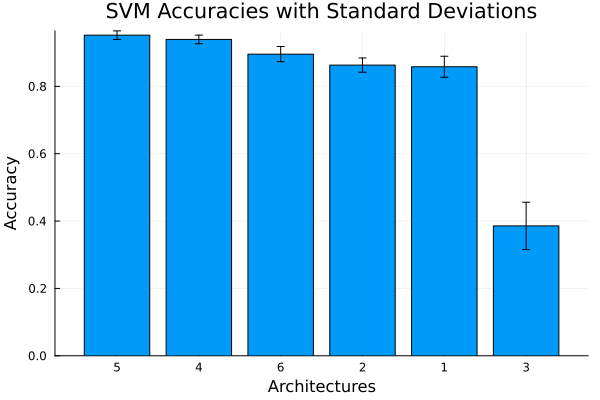

In [6]:
plot_acc_comparison(model, all_metrics)

## Discussion
The models demonstrate quite good performance. Particularly, a linear kernel with a high C parameter (C high) seems to work quite well. This suggests that the model benefits from a less regularized approach, allowing for more flexibility in fitting the data. 

Next, we will experiment with polynomial kernels to see if they offer any improvement.

In [7]:
hyperparameters = [
    Dict(:kernel => "poly", :degree => 2, :C => 1.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 5.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 0.1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 3, :C => 1.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 3, :C => 5.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 3, :C => 0.1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 4, :C => 1.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 4, :C => 5.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 4, :C => 0.1, :random_state => seed),
]

all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8
Training with set of hyperparameters 9

----- acc means -----
Hyperparams set 2 -> 0.895 ± 0.024
Hyperparams set 1 -> 0.894 ± 0.017
Hyperparams set 3 -> 0.885 ± 0.019
Hyperparams set 4 -> 0.876 ± 0.021
Hyperparams set 5 -> 0.874 ± 0.028
Hyperparams set 6 -> 0.866 ± 0.026
Hyperparams set 9 -> 0.852 ± 0.036
Hyperparams set 7 -> 0.849 ± 0.027
Hyperparams set 8 -> 0.846 ± 0.028

----- sensitivity means -----
Hyperparams set 2 -> 0.895 ± 0.024
Hyperparams set 1 -> 0.894 ± 0.017
Hyperparams set 3 -> 0.885 ± 0.019
Hyperparams set 4 -> 0.876 ± 0.021
Hyperparams set 5 -> 0.874 ± 0.028
Hyperparams set 6 -> 0.866 ± 0.026
Hyperparams set 9 -> 0.852 ± 0.036
Hyperparams set 7 -> 0.849 ± 0.027


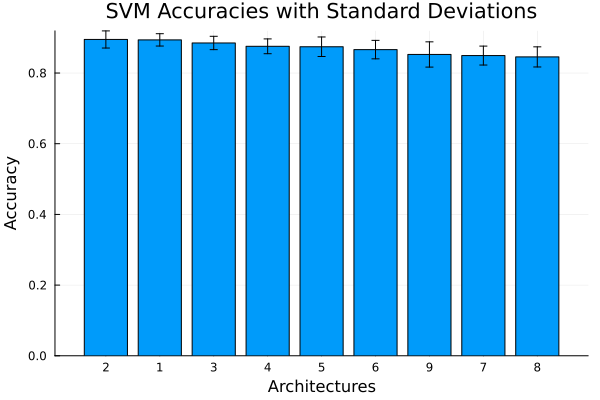

In [8]:
plot_acc_comparison(model, all_metrics)

### Discussion

Still good results, but do not surpass the performance of the previous experiment. In general, a high C parameter seems to also work better here, along with degree 2 polynomials. We will test various configurations of linear and polynomial kernels to determine which performs best. The goal is to test different C values and identify the optimal configuration.


In [9]:
hyperparameters = [
    Dict(:kernel => "linear", :C => 3.0, :random_state => seed),
    Dict(:kernel => "linear", :C => 4.0, :random_state => seed),
    Dict(:kernel => "linear", :C => 5.0, :random_state => seed),
    Dict(:kernel => "linear", :C => 6.0, :random_state => seed),
    Dict(:kernel => "linear", :C => 7.0, :random_state => seed),
    Dict(:kernel => "linear", :C => 8.1, :random_state => seed),
    Dict(:kernel => "linear", :C => 9.0, :random_state => seed),
    Dict(:kernel => "linear", :C => 10.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 3.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 4.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 5.1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 6.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 7.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 8.1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 9.0, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 10.0, :random_state => seed)
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8
Training with set of hyperparameters 9
Training with set of hyperparameters 10
Training with set of hyperparameters 11
Training with set of hyperparameters 12
Training with set of hyperparameters 13
Training with set of hyperparameters 14
Training with set of hyperparameters 15
Training with set of hyperparameters 16

----- acc means -----
Hyperparams set 8 -> 0.957 ± 0.01
Hyperparams set 6 -> 0.954 ± 0.012
Hyperparams set 5 -> 0.954 ± 0.009
Hyperparams set 7 -> 0.953 ± 0.014
Hyperparams set 3 -> 0.952 ± 0.013
Hyperparams set 4 -> 0.95 ± 0.012
Hyperparams set 1 -> 0.948 ± 0.012
Hyperparams set 2 -> 0.948 ± 0.009
Hyperparams set 13 -> 0.899 ± 0.026
Hyperparams set 12 -> 0.898 ± 0.

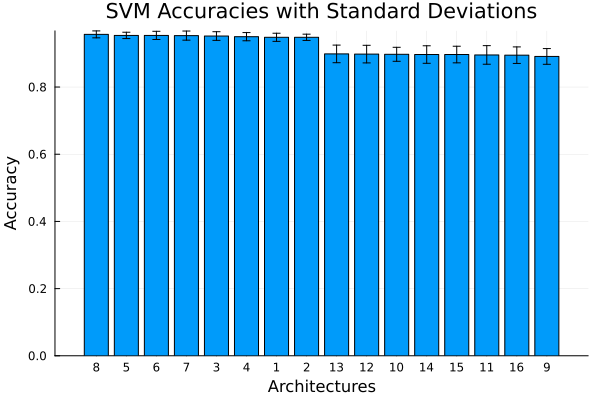

In [10]:
plot_acc_comparison(model, all_metrics)

### Discussion
As can be easily seen from the order of the results, linear kernels are yielding better outcomes. Additionally, within both groups, those with a larger C value are performing better, being the best configuration a **linear kernel** with **C = 10**. Finally, we will test the hyperparameter `gamma = 'auto'`, which is available for RBF and polynomial kernels, to see if it yields better results. This test aims to explore whether automatically adjusting the gamma value based on the dataset's features improves the model's performance, especially considering that this parameter influences the decision boundary's curvature in non-linear kernels. 

In [11]:
hyperparameters = [
    Dict(:kernel => "rbf", :C => 8.0, :gamma => "auto", :random_state => seed), # gamma by default is in "scale"
    Dict(:kernel => "rbf", :C => 9.0, :gamma => "auto", :random_state => seed),
    Dict(:kernel => "rbf", :C => 10.0, :gamma => "auto", :random_state => seed),
    Dict(:kernel => "rbf", :C => 11.0, :gamma => "auto", :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 8.0, :gamma => "auto", :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 9.0, :gamma => "auto", :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 10.0, :gamma => "auto", :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 11.0, :gamma => "auto", :random_state => seed),
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8

----- acc means -----
Hyperparams set 1 -> 0.92 ± 0.01
Hyperparams set 3 -> 0.918 ± 0.007
Hyperparams set 2 -> 0.918 ± 0.009
Hyperparams set 4 -> 0.918 ± 0.013
Hyperparams set 7 -> 0.903 ± 0.021
Hyperparams set 6 -> 0.902 ± 0.022
Hyperparams set 8 -> 0.901 ± 0.024
Hyperparams set 5 -> 0.898 ± 0.02

----- sensitivity means -----
Hyperparams set 1 -> 0.92 ± 0.01
Hyperparams set 3 -> 0.918 ± 0.007
Hyperparams set 2 -> 0.918 ± 0.009
Hyperparams set 4 -> 0.917 ± 0.013
Hyperparams set 7 -> 0.903 ± 0.021
Hyperparams set 6 -> 0.902 ± 0.022
Hyperparams set 8 -> 0.901 ± 0.024
Hyperparams set 5 -> 0.898 ± 0.02

----- specificity means -----
Hyperparams set 1 -> 0.973 ± 0.004
Hyperparams se

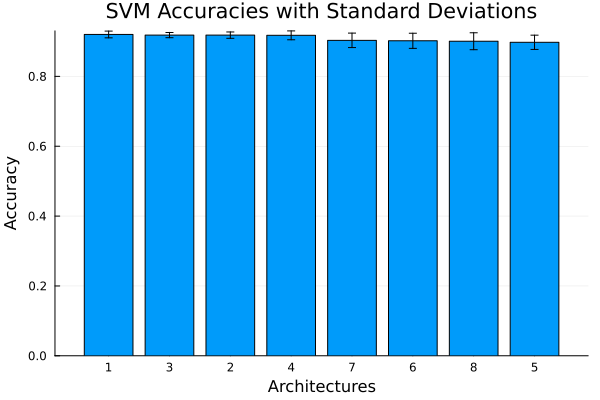

In [12]:
plot_acc_comparison(model, all_metrics)

### Discussion

It is noticeable that, especially with RBF kernels, increasing `C` and setting gamma to 'auto' have improved performance. However, this does not surpass the best accuracy achieved previously. It appears that for this particular dataset, the linear model with a properly tuned regularization parameter `C` remains the most effective approach, indicating that the data's underlying patterns might be more linear in nature.

## Final discussion

Finally, as can be seen in the graph below, the best model is obtained in the third experiment, with the following hyperparameters:

1. `kernel`: `linear`
2. `C`: `10`

This results in an accuracy of **0.957 ± 0.01**.

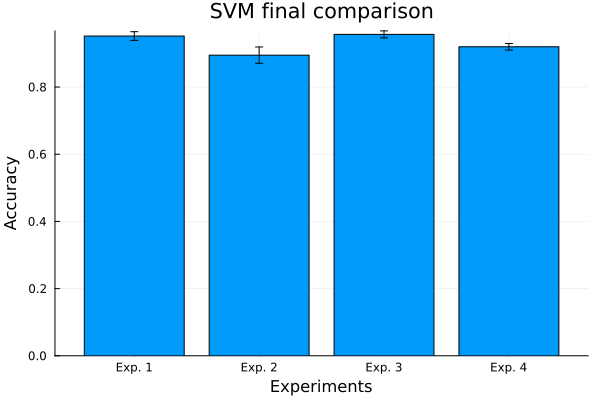

In [13]:
plot_final_comparison("SVM final comparison", best_models_acc)